In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.io import fits
from scipy.signal import find_peaks
from rascal.calibrator import Calibrator

/home/fer/rascal/rascal/calibrator.py:34: TqdmExperimentalWarning:

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)



(1024,)


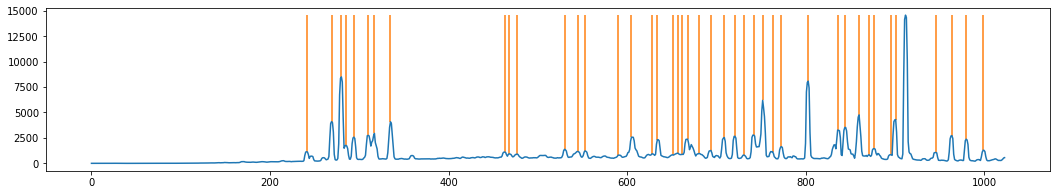

In [2]:
spectrum = np.median(fits.open('./examples/v_a_20190516_55_1_0_1.fits')[0].data[110:120], axis=0)
print(spectrum.shape)
peaks, _ = find_peaks(spectrum, height=800, distance=5, threshold=None)

plt.figure(figsize=(18,3))
plt.plot(spectrum)
plt.vlines(peaks,
              spectrum[peaks.astype('int')],
              spectrum.max(),
              colors='C1')

In [3]:
c = Calibrator(peaks, elements=["Xe"], min_wavelength=3400., max_wavelength=8100.)
c.set_fit_constraints(n_pix=1024,
                      range_tolerance=200,
                      polydeg=3
                     )

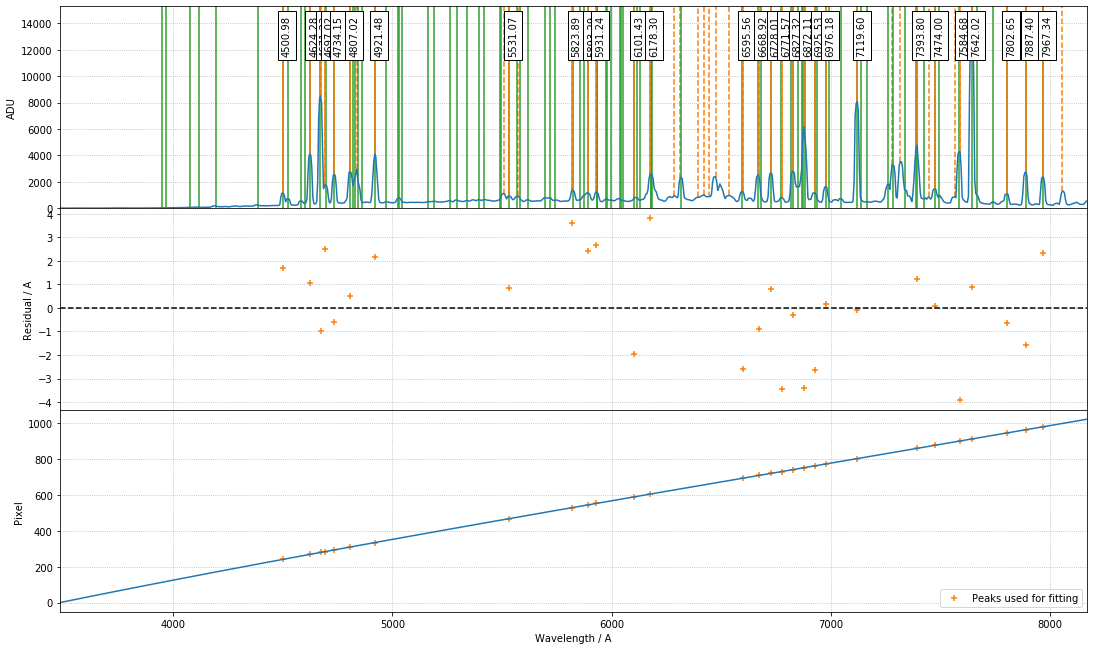

In [4]:
best_p = c.fit(mode='normal', progress=False)
c.plot_fit(spectrum, best_p)

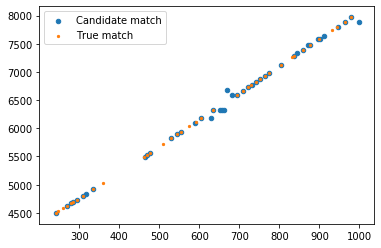

In [5]:
peaks, wavelengths, lamps = np.loadtxt("./examples/ground_truth_v_a.csv", delimiter=',', dtype='U').T

peaks = peaks.astype('float32')
wavelengths = wavelengths.astype('float32')

x, y = c._combine_linear_estimates(c.candidates)
plt.scatter(x, y, s=20, label="Candidate match")
plt.scatter(peaks, wavelengths, s=5, label="True match")
plt.legend()